In [1]:
import numpy as np
import pandas as pd

In [2]:
df= pd.read_csv("spam.csv",encoding="latin-1")

In [3]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
4226,ham,Buy one egg for me da..please:),NaN,NaN,NaN
876,ham,Are you in castor? You need to see something,NaN,NaN,NaN
3480,ham,Wherre's my boytoy ? :-(,NaN,NaN,NaN
3572,spam,You won't believe it but it's true. It's Incre...,NaN,NaN,NaN
3247,ham,Also track down any lighters you can find,NaN,NaN,NaN


In [4]:
df.shape

(5572, 5)

In [5]:
# 1.Data Cleaning 
# 2.EDA 
# 3.Data/Text Pre-processing 
# 4.Model Building 
# 5.Evaluation 
# 6.Improvments 
# 7.Website 
# 8.Deploy

# 1.Data Cleaning

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [7]:
# drop last 3 columns
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [8]:
df.sample(5)

,v1,v2
3813,ham,Can. Dunno wat to get 4 her...
1689,ham,Bring tat cd don forget
3628,ham,Should I head straight there or what
3559,ham,Lol I know! Hey someone did a great inpersonat...
2986,ham,"I'm there and I can see you, but you can't see..."


In [9]:
#Renaming the columns
df.rename(columns={'v1':'target','v2':'text'},inplace=True)
df.sample(5)

,target,text
3893,spam,Dear Dave this is your final notice to collect...
4544,ham,Never y lei... I v lazy... Got wat? Dat day Ì_...
1409,ham,Where at were hungry too
1107,ham,From someone not to smoke when every time I've...
263,spam,Hey I am really horny want to chat or see me n...


In [10]:
#lable incoder for coverting target value as 0 amd 1 for model
from sklearn.preprocessing import LabelEncoder
encoder= LabelEncoder()
df['target']=encoder.fit_transform(df['target'])

In [11]:
df.head()
#ham=0
#spam=1

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [12]:
#missing values
df.isnull().sum()

target    0
text      0
dtype: int64

In [13]:
#checking for duplicate values
df.duplicated().sum()

403

In [14]:
#Removing Dublicate values
df=df.drop_duplicates(keep='first')

In [15]:
#checking for duplicate values
df.duplicated().sum()

0

In [16]:
df.shape

(5169, 2)

# 2.EDA

In [17]:
#First we have to check how much spam data and how much ham data in dataset
df['target'].value_counts()

0    4516
1     653
Name: target, dtype: int64

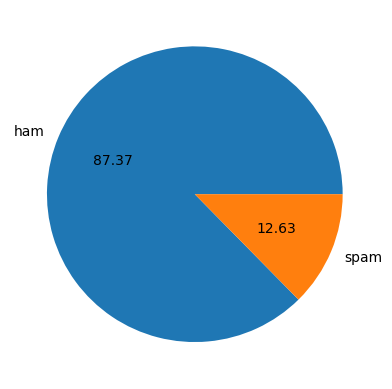

In [18]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct='%0.2f')
plt.show()

In [19]:
#Data is Imbalance

In [20]:
#check how much alphabets,words,sentenses are use in massage
import nltk #Natural Language Tool Kit
nltk.download('punkt')

[nltk_data] Downloading package punkt to C:\Users\ABHAYRAJ
[nltk_data]     SINGH\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

### we have create three new columns 

In [21]:
#1.numbers of characters in columns 
df['num_character']=df['text'].apply(len)

In [22]:
df.head(5)

,target,text,num_character
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [23]:
#2.numbers of words in sms
df['num_words']=df['text'].apply(lambda x:len(nltk.word_tokenize(x)))#Break into words

In [24]:
df.head(5)

,target,text,num_character,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [25]:
#3.numbers of sentenses in sms
df['num_sentenses']=df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [26]:
df.head(5)

,target,text,num_character,num_words,num_sentenses
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [27]:
df[['num_character','num_words','num_sentenses']].describe()

,num_character,num_words,num_sentenses
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.453279,1.947185
std,58.236293,13.324793,1.362406
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,28.000000


In [28]:
#Describe for ham msg
df[df['target']==0][['num_character','num_words','num_sentenses']].describe()

,num_character,num_words,num_sentenses
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.120903,1.799601
std,56.358207,13.493725,1.278465
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,28.000000


In [29]:
#Describe for spam msg
df[df['target']==1][['num_character','num_words','num_sentenses']].describe()

,num_character,num_words,num_sentenses
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.967841
std,30.137753,7.008418,1.483201
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,8.000000


In [30]:
#plotting histogram for ham and spam
import seaborn as sns

<AxesSubplot:xlabel='num_character', ylabel='Count'>

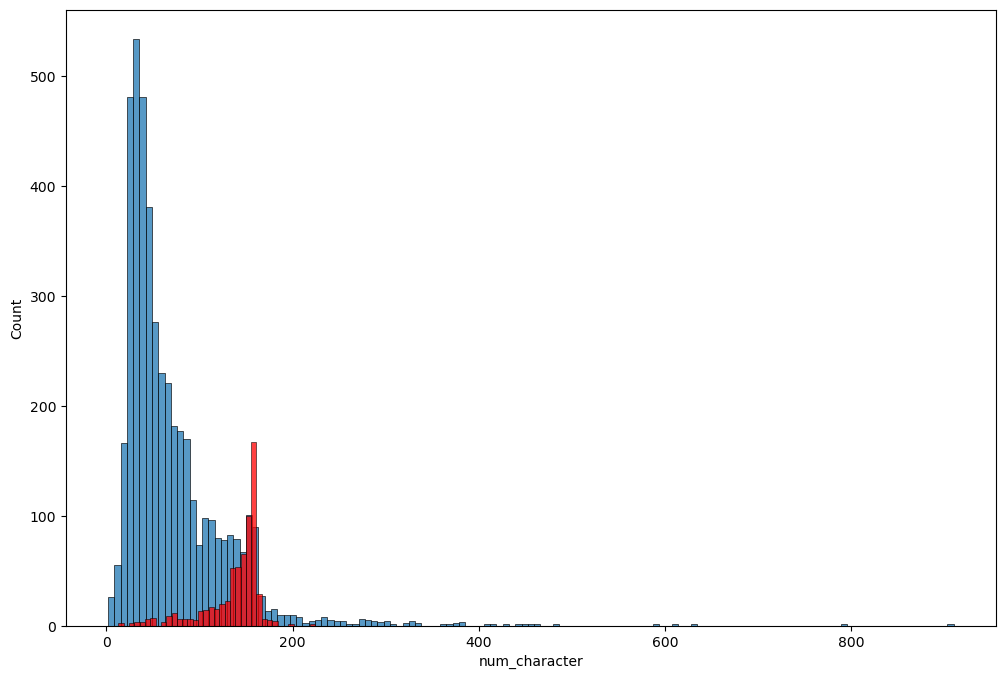

In [31]:
plt.figure(figsize=(12,8))
sns.histplot(df[df['target']==0]['num_character'])
sns.histplot(df[df['target']==1]['num_character'],color='red')

<AxesSubplot:xlabel='num_words', ylabel='Count'>

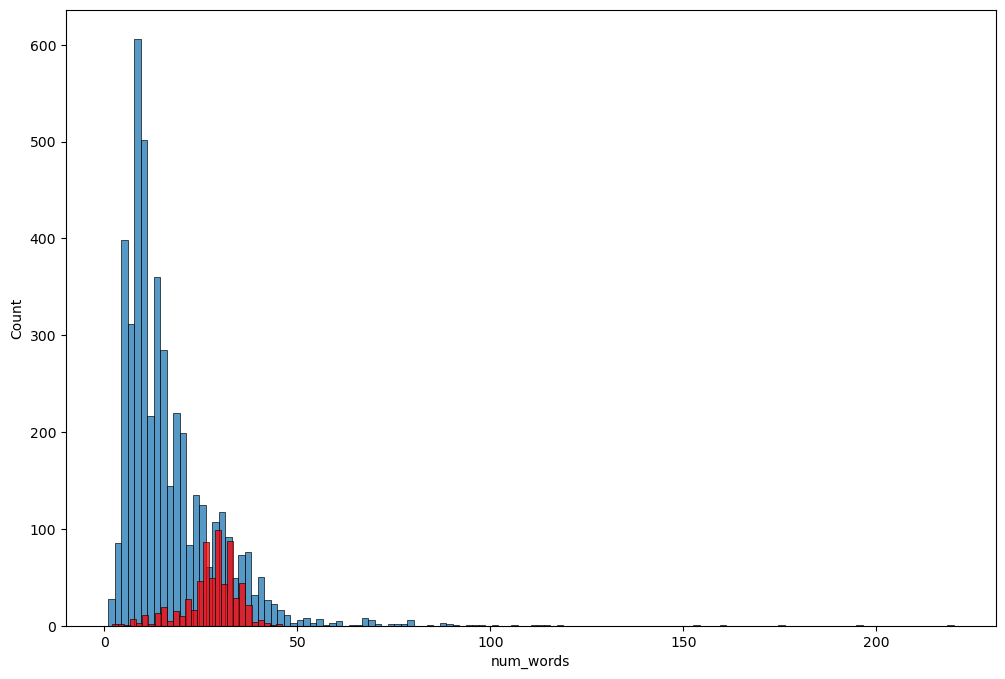

In [32]:
plt.figure(figsize=(12,8))
sns.histplot(df[df['target']==0]['num_words'])
sns.histplot(df[df['target']==1]['num_words'],color='red')

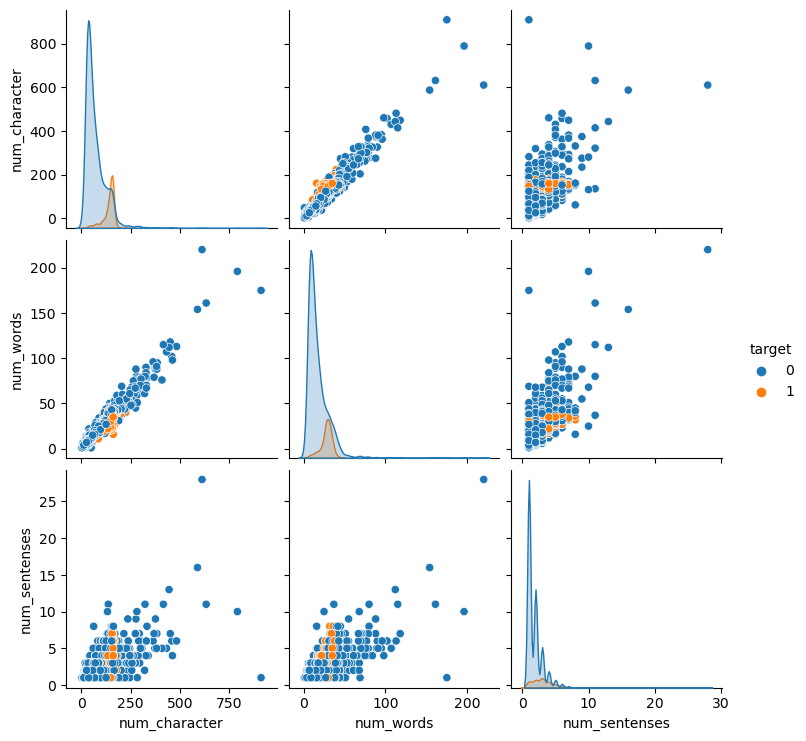

In [33]:
#Relation between all the columns
sns.pairplot(df,hue='target')

<AxesSubplot:>

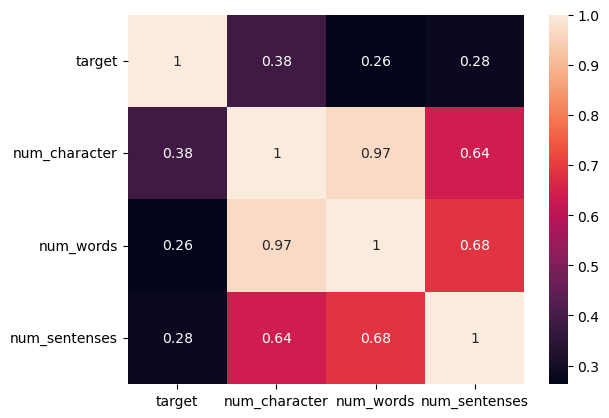

In [34]:
#perasen corfficienat using Heat map
sns.heatmap(df.corr(),annot=True)

# 3.Data Preprocessing

In [35]:
# Lower Case 
# Tokenization(breake in sentences) 
# Removing 
# stop words(Words that have no meaning in a sentence,which are only for sentence formation like i,my,myself,you're,you'll)
# puncuation 
#Stemming(Removing similler words like dance dancing etc.)

In [36]:
from nltk.corpus import stopwords
import string
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()

def transform_text(text):
    text=text.lower()
    
    text=nltk.word_tokenize(text)
    
    y=[]
    for i in text:
        if i.isalnum():
            y.append(i)
            
    text=y[:]
    y.clear()
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    
    text=y[:]
    y.clear()
    for i in text:
        y.append(ps.stem(i))
        
    return " ".join(y)

In [37]:
import nltk #Natural Language Tool Kit
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to C:\Users\ABHAYRAJ
[nltk_data]     SINGH\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [38]:
transform_text("I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today.")

'gon na home soon want talk stuff anymor tonight k cri enough today'

In [39]:
df['text'][10]

"I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today."

In [40]:
df['transformed_text']=df['text'].apply(transform_text)

In [41]:
df.head()

,target,text,num_character,num_words,num_sentenses,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [42]:
#now we create word cloud of ham and spam (word cloud is important words in big size)
from wordcloud import WordCloud
wc=WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [44]:
#for spam
spam_wc=wc.generate(df[df['target']==1]['transformed_text'].str.cat(sep=" "))

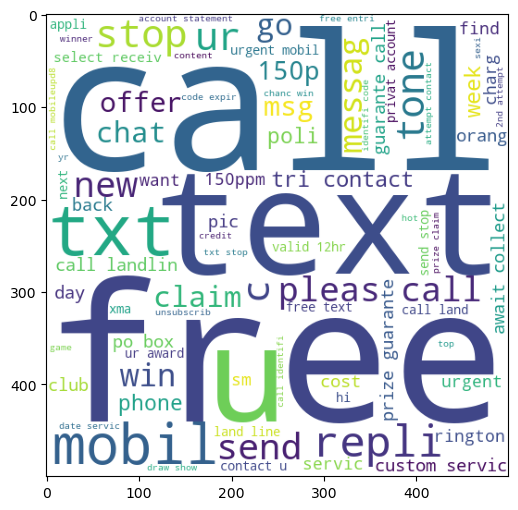

In [46]:
plt.figure(figsize=(12,6))
plt.imshow(spam_wc)

In [47]:
#For ham
ham_wc=wc.generate(df[df['target']==0]['transformed_text'].str.cat(sep=" "))

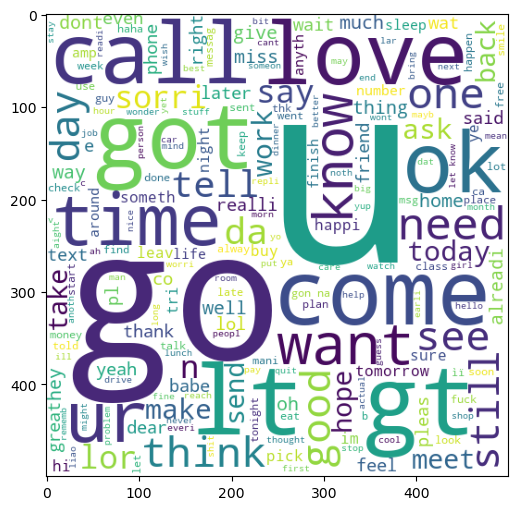

In [48]:
plt.figure(figsize=(12,6))
plt.imshow(ham_wc)

In [51]:
#top 30 word which use frequently in spam Massage
spam_corpus=[]
for msg in df[df['target']==1]['transformed_text'].tolist():#converting transformed_text of spam massage into list
    for word in msg.split():
        spam_corpus.append(word)

In [52]:
len(spam_corpus)

9939

C:\Users\ABHAYRAJ SINGH\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


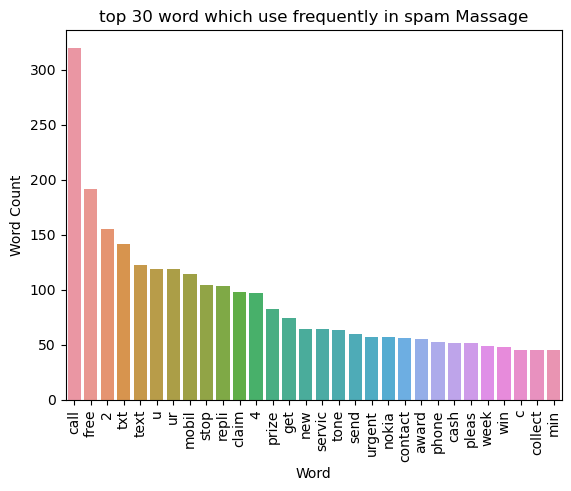

In [61]:
from collections import Counter
sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[0],pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.title("top 30 word which use frequently in spam Massage")
plt.xlabel("Word")#0
plt.ylabel("Word Count")#1
plt.show()

C:\Users\ABHAYRAJ SINGH\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


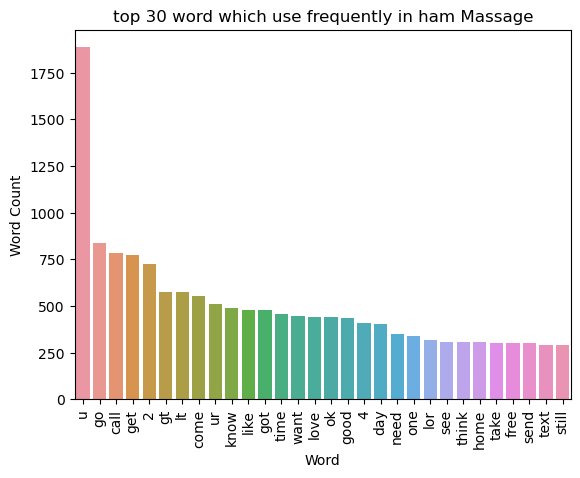

In [63]:
#top 30 word which use frequently in ham Massage
ham_corpus=[]
for msg in df[df['target']==0]['transformed_text'].tolist():#converting transformed_text of spam massage into list
    for word in msg.split():
        spam_corpus.append(word)


#ploting
from collections import Counter
sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[0],pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.title("top 30 word which use frequently in ham Massage")
plt.xlabel("Word")#0
plt.ylabel("Word Count")#1
plt.show()

# 4.Model Building

### Naive Bayes classification

In [178]:
#Naive Bayes is good for text base classification 
#First we have to change our input("Transformed_text") into numerical form(victorization)
#we make a bag of word(Most frequently word) and compare it with massage
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv=CountVectorizer()
tfidf=TfidfVectorizer(max_features=3000)
#X=cv.fit_transform(df['transformed_text']).toarray()
X=tfidf.fit_transform(df['transformed_text']).toarray()

In [179]:
X.shape

(5169, 3000)

In [180]:
y=df['target'].values

In [181]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [182]:
#Spliting our data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

In [183]:
#here we call multiple naive bayes because we don't know the distribution of data
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()

In [140]:
#GaussianNB
gnb.fit(X_train,y_train)
y_pred1=gnb.predict(X_test)
print("Accuracy:",accuracy_score(y_test,y_pred1))
print("Confusion Matrix:",confusion_matrix(y_test,y_pred1))
print("Precision:",precision_score(y_test,y_pred1))

Accuracy: 0.8907156673114119
Confusion Matrix: [[800  96]
 [ 17 121]]
Precision: 0.5576036866359447


In [184]:
#MultinomialNB
mnb.fit(X_train,y_train)
y_pred2=mnb.predict(X_test)
print("Accuracy:",accuracy_score(y_test,y_pred2))
print("Confusion Matrix:",confusion_matrix(y_test,y_pred2))
print("Precision:",precision_score(y_test,y_pred2))

Accuracy: 0.9709864603481625
Confusion Matrix: [[896   0]
 [ 30 108]]
Precision: 1.0


In [120]:
#BernoulliNB
bnb.fit(X_train,y_train)
y_pred3=bnb.predict(X_test)
print("Accuracy:",accuracy_score(y_test,y_pred3))
print("Confusion Matrix:",confusion_matrix(y_test,y_pred3))
print("Precision:",precision_score(y_test,y_pred3))

Accuracy: 0.9835589941972921
Confusion Matrix: [[895   1]
 [ 16 122]]
Precision: 0.991869918699187


In [121]:
# tfidf ---> MultinomialNB

# 5.Evaluation

In [141]:
#All Classification Algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

svc =SVC(kernel='sigmoid',gamma=1.0)
knc =KNeighborsClassifier()
mnb =MultinomialNB()
dtc =DecisionTreeClassifier(max_depth=5)
lrc =LogisticRegression(solver='liblinear',penalty='l1')
rfc =RandomForestClassifier(n_estimators=50,random_state=2)
abc =AdaBoostClassifier(n_estimators=50,random_state=2)
bc  =BaggingClassifier(n_estimators=50,random_state=2)
etc =ExtraTreesClassifier(n_estimators=50,random_state=2)
gbdt=GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb =XGBClassifier(n_estimators=50,random_state=2)

In [142]:
# dictiony of classifier
clfs={
    'SVC':svc,
    'KNeigh':knc,
    'NB':mnb,
    'DecTree':dtc,
    'LogReg':lrc,
    'RanFor':rfc,
    'AdaBoost':abc,
    'Bagg':bc,
    'ExtraTree':etc,
    'Gradin':gbdt,
    'Xgb':xgb,
}

In [143]:
#method for training classifier
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred=clf.predict(X_test)
    accuracy=accuracy_score(y_test,y_pred)
    precision=precision_score(y_test,y_pred)
    return accuracy,precision

In [144]:
#calling method for every classifier
accuracy_scores=[]
precision_scores=[]
for name,clf in clfs.items():
    current_accuracy,current_precision=train_classifier(clf,X_train,y_train,X_test,y_test)
    
    print("For",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)
    

C:\Users\ABHAYRAJ SINGH\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


For SVC
Accuracy -  0.8665377176015474
Precision -  0.0


C:\Users\ABHAYRAJ SINGH\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


For KNeigh
Accuracy -  0.8858800773694391
Precision -  0.8333333333333334
For NB
Accuracy -  0.9738878143133463
Precision -  0.9512195121951219
For DecTree
Accuracy -  0.9439071566731141
Precision -  0.8703703703703703
For LogReg
Accuracy -  0.965183752417795
Precision -  0.9553571428571429
For RanFor
Accuracy -  0.9680851063829787
Precision -  0.981651376146789
For AdaBoost
Accuracy -  0.9642166344294004
Precision -  0.9316239316239316
For Bagg
Accuracy -  0.9661508704061895
Precision -  0.8992248062015504
For ExtraTree
Accuracy -  0.9806576402321083
Precision -  0.9758064516129032
For Gradin
Accuracy -  0.9516441005802708
Precision -  0.9313725490196079
For Xgb
Accuracy -  0.9709864603481625
Precision -  0.9426229508196722


### Acuracy and precision

In [106]:
#Storing Performance in Dataset
#these data set is not run after setting max_feature=3000 and Scalling the X
performance_df=pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)
performance_df

,Algorithm,Accuracy,Precision
1,KNeigh,0.900387,1.000000
2,NB,0.959381,1.000000
5,RanFor,0.973888,1.000000
8,ExtraTree,0.975822,0.982906
0,SVC,0.972921,0.974138
6,AdaBoost,0.961315,0.945455
4,LogReg,0.951644,0.940000
10,Xgb,0.969052,0.934426
9,Gradin,0.952611,0.923810
7,Bagg,0.958414,0.862595


In [107]:
#these data set is not run after setting max_feature=3000 and Scalling the X
performance_df1=pd.melt(performance_df,id_vars='Algorithm')

In [108]:
#these data set is not run after setting max_feature=3000 and Scalling the X
performance_df1

,Algorithm,variable,value
0,KNeigh,Accuracy,0.900387
1,NB,Accuracy,0.959381
2,RanFor,Accuracy,0.973888
3,ExtraTree,Accuracy,0.975822
4,SVC,Accuracy,0.972921
5,AdaBoost,Accuracy,0.961315
6,LogReg,Accuracy,0.951644
7,Xgb,Accuracy,0.969052
8,Gradin,Accuracy,0.952611
9,Bagg,Accuracy,0.958414


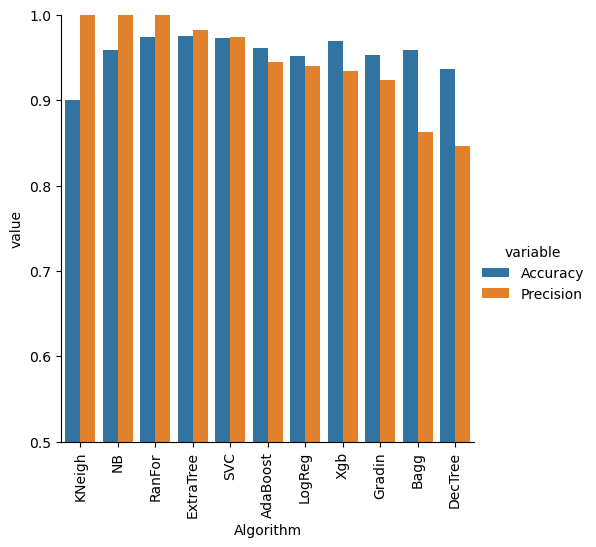

In [109]:
# Plotting the test
#these data set is not run after setting max_feature=3000 and Scalling the X
sns.catplot(x='Algorithm',y='value',hue='variable',data=performance_df1,kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

# 6.MODEL IMPROVMENT

### changing/setting max_feature=3000

In [126]:
#these data set is not run after Scalling the X
#YOU HAVE TO RUN THESE CELL after setting max_feature=3000
#before satting max_feature
# from sklearn.feature_extraction.text import TfidfVectorizer
# tfidf=TfidfVectorizer()

# in tfidf there is max_feature function where we can set how much of data machine will train
# max_features=3000


#data frame after max_feature=3000
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores}).sort_values('Precision_max_ft_3000',ascending=False)
#merging it with previous dataset
new_df = performance_df.merge(temp_df,on='Algorithm')

In [127]:
#these data set is not run after Scalling the X
new_df

,Algorithm,Accuracy,Precision,Accuracy_max_ft_3000,Precision_max_ft_3000
0,KNeigh,0.900387,1.000000,0.905222,1.000000
1,NB,0.959381,1.000000,0.970986,1.000000
2,RanFor,0.973888,1.000000,0.974855,0.982759
3,ExtraTree,0.975822,0.982906,0.974855,0.974576
4,SVC,0.972921,0.974138,0.975822,0.974790
5,AdaBoost,0.961315,0.945455,0.960348,0.929204
6,LogReg,0.951644,0.940000,0.958414,0.970297
7,Xgb,0.969052,0.934426,0.971954,0.943089
8,Gradin,0.952611,0.923810,0.947776,0.920000
9,Bagg,0.958414,0.862595,0.957447,0.867188


### Scaling the X

In [128]:
# Now we scale the X to check wether oue model is improve or not
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
X=scaler.fit_transform(X)
#after running that u have to run from spittin data to method calling

In [134]:
#YOU HAVE TO RUN spittin data to method calling BEFORE IT
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_scaling':accuracy_scores,'Precision_scaling':precision_scores}).sort_values('Precision_scaling',ascending=False)
#merging dataset from previous one
new_df_scaled = new_df.merge(temp_df,on='Algorithm')

In [135]:
new_df_scaled

,Algorithm,Accuracy,Precision,Accuracy_max_ft_3000,Precision_max_ft_3000,Accuracy_scaling,Precision_scaling
0,KNeigh,0.900387,1.000000,0.905222,1.000000,0.905222,0.976190
1,NB,0.959381,1.000000,0.970986,1.000000,0.978723,0.946154
2,RanFor,0.973888,1.000000,0.974855,0.982759,0.974855,0.982759
3,ExtraTree,0.975822,0.982906,0.974855,0.974576,0.974855,0.974576
4,SVC,0.972921,0.974138,0.975822,0.974790,0.966151,0.925620
5,AdaBoost,0.961315,0.945455,0.960348,0.929204,0.960348,0.929204
6,LogReg,0.951644,0.940000,0.958414,0.970297,0.967118,0.964286
7,Xgb,0.969052,0.934426,0.971954,0.943089,0.971954,0.943089
8,Gradin,0.952611,0.923810,0.947776,0.920000,0.947776,0.920000
9,Bagg,0.958414,0.862595,0.957447,0.867188,0.957447,0.867188


### Adding num_character in our dataset

In [136]:
#Now we take num_character in our dataset and see that there is any change in our model precision
#appending the num_character col to X
X=np.hstack((X,df['num_character'].values.reshape(-1,1)))

In [145]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_num_chars':accuracy_scores,'Precision_num_chars':precision_scores}).sort_values('Precision_num_chars',ascending=False)
new_df_scaled.merge(temp_df,on='Algorithm')

,Algorithm,Accuracy,Precision,Accuracy_max_ft_3000,Precision_max_ft_3000,Accuracy_scaling,Precision_scaling,Accuracy_num_chars,Precision_num_chars
0,KNeigh,0.900387,1.000000,0.905222,1.000000,0.905222,0.976190,0.885880,0.833333
1,NB,0.959381,1.000000,0.970986,1.000000,0.978723,0.946154,0.973888,0.951220
2,RanFor,0.973888,1.000000,0.974855,0.982759,0.974855,0.982759,0.968085,0.981651
3,ExtraTree,0.975822,0.982906,0.974855,0.974576,0.974855,0.974576,0.980658,0.975806
4,SVC,0.972921,0.974138,0.975822,0.974790,0.966151,0.925620,0.866538,0.000000
5,AdaBoost,0.961315,0.945455,0.960348,0.929204,0.960348,0.929204,0.964217,0.931624
6,LogReg,0.951644,0.940000,0.958414,0.970297,0.967118,0.964286,0.965184,0.955357
7,Xgb,0.969052,0.934426,0.971954,0.943089,0.971954,0.943089,0.970986,0.942623
8,Gradin,0.952611,0.923810,0.947776,0.920000,0.947776,0.920000,0.951644,0.931373
9,Bagg,0.958414,0.862595,0.957447,0.867188,0.957447,0.867188,0.966151,0.899225


### know we performing voting classifier

In [149]:
#know we create combination of best perfornimg model for voting Classifier
svc=SVC(kernel='sigmoid',gamma=1.0,probability=True)
mnb=MultinomialNB()
etc=ExtraTreesClassifier(n_estimators=50,random_state=2)

from sklearn.ensemble import VotingClassifier

In [150]:
#max_feature=3000 gives good models so we select that
voting=VotingClassifier(estimators=[('svm',svc),('nb',mnb),('et',etc)],voting='soft')
voting.fit(X_train,y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [151]:
y_pred=voting.predict(X_test)
print('Accuracy',accuracy_score(y_test,y_pred))
print('Precision',precision_score(y_test,y_pred))

Accuracy 0.9816247582205029
Accuracy 0.9917355371900827


### Appling stacking

In [152]:
estimators=[('svm',svc),('nb',mnb),('et',etc)]
final_estimator=RandomForestClassifier()
from sklearn.ensemble import StackingClassifier
clf=StackingClassifier(estimators=estimators, final_estimator=final_estimator)

In [153]:
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
print('Accuracy',accuracy_score(y_test,y_pred))
print('Accuracy',precision_score(y_test,y_pred))

Accuracy 0.9777562862669246
Accuracy 0.9323308270676691


In [154]:
#when there is new email then our 
# first action is transforming the text
# second action is vectorization
# and last action in Algorithm

In [185]:
#we Select MultinomialNB where max_feature=3000
#now we create pipeline
import pickle
pickle.dump(tfidf,open('Vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))